<a href="https://colab.research.google.com/github/salexey1990/gb/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot
import scipy.special as sp
import pandas as pd

%matplotlib inline

In [2]:

# Подключение к Google drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

df = pd.read_csv('/content/drive/My Drive/mnist_train_100.csv', low_memory=False)

In [0]:
def prepare_data(df):
  output_nodes = 10

  data = df.values
  scaled_inputs = (data[:,1:] / 255 * 0.99) + 0.01
  targets = np.zeros((data.shape[0], output_nodes)) + 0.01
  for i, target in enumerate(data[:,0:1]):
    targets[i, target] = 0.99
  return zip(scaled_inputs, targets)

In [0]:
class NeuralNetwork:
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.i_nodes = inputnodes
    self.h_nodes = hiddennodes
    self.o_nodes = outputnodes

    self.l_rate = learningrate

    self.w_i_h = np.random.normal(0.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.i_nodes))
    self.w_h_o = np.random.normal(0.0, pow(self.o_nodes, -0.5), (self.o_nodes, self.h_nodes))

    self.activation_function = lambda x: sp.expit(x)

  def train(self, X_train, y_train):
    inputs = np.array(X_train, ndmin=2).T
    target = np.array(y_train, ndmin=2).T

    h_inputs = np.dot(self.w_i_h, inputs)
    h_outputs = self.activation_function(h_inputs)

    o_inputs = np.dot(self.w_h_o, h_outputs)
    o_outputs = self.activation_function(o_inputs)

    o_error = target - o_outputs
    h_error = np.dot(self.w_h_o.T, o_error)

    self.w_h_o += self.l_rate * np.dot((o_error * o_outputs * (1 - o_outputs)), h_outputs.T)
    self.w_i_h += self.l_rate * np.dot((h_error * h_outputs * (1 - h_outputs)), inputs.T)

  def query(self, nn_input):
    inputs = np.array(nn_input, dtype=float,).T

    h_inputs = np.dot(self.w_i_h, nn_input)
    h_outputs = self.activation_function(h_inputs)

    o_inputs = np.dot(self.w_h_o, h_outputs)
    o_outputs = self.activation_function(o_inputs)

    return o_outputs


In [0]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [0]:
for inputs, target in prepare_data(df):
  nn.train(inputs, target)

In [0]:
df_test = pd.read_csv('/content/drive/My Drive/mnist_test_10.csv', low_memory=False)

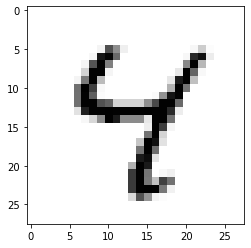

In [93]:
image = list(prepare_data(df_test))[5][0].reshape((28,28))
matplotlib.pyplot.imshow(image, cmap='Greys', interpolation='None')

In [100]:
nn.query(list(prepare_data(df_test))[5][0])

array([0.02174206, 0.0045232 , 0.00828052, 0.11371603, 0.55481536,
       0.1141902 , 0.01457938, 0.3073045 , 0.09131564, 0.05449081])

In [105]:
correct = 0
for X, y in prepare_data(df_test):
  correct += np.argmax(nn.query(X)) == np.argmax(y)

print(correct, 'correct answers')
print(correct/df_test.shape[0] * 100, ' %')

5 correct answers
55.55555555555556  %


In [112]:
df_full = pd.read_csv('/content/drive/My Drive/mnist_train.csv', low_memory=False)
df_test_full = pd.read_csv('/content/drive/My Drive/mnist_test.csv', low_memory=False)

learning_rate = 0.1
hidden_nodes = 200
epochs = 5

nn_final = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
for epoch in range(epochs):
  for inputs, target in prepare_data(df_full):
    nn_final.train(inputs, target)

  correct = 0
  for X, y in prepare_data(df_test_full):
    correct += np.argmax(nn_final.query(X)) == np.argmax(y)

  print('epoch #', epoch)
  print(correct, 'correct answers')
  print(correct/df_test_full.shape[0] * 100, ' %')
  print()

epoch # 0
9552 correct answers
95.52955295529553  %

epoch # 1
9676 correct answers
96.76967696769677  %

epoch # 2
9706 correct answers
97.06970697069707  %

epoch # 3
9720 correct answers
97.20972097209722  %

epoch # 4
9721 correct answers
97.21972197219722  %

